## Modèles SIR simples

### 1) Modèle à système fermé et population constante

\begin{equation}
\begin{cases}
\dot{S}= -\frac{β}{N_0}SI \\
\dot{I}=\frac{β}{N_0}SI - gI\\
\dot{R}= gI\\
\ N = S + I + R = N_0
\end{cases}
\end{equation}

- En première approche on pose un modèle SIR considérant l'évolution dans le temps du nombre de potentiels malades (S), d'infectés (I) et de personnes résistantes, immunisées et soignées (R). Ces individus constituent la population totale de taille N


- Dans le premier modèle simple, on suppose le système fermé, la population initiale est constante et déterminée.
Ce modèle est cependant trop simple ne prenant pas en compte 
L'importance de la densité d'infectée est ainsi d'autant plus importante dans ce modèle, l'évolution des différents paramètre dépend ici de I au carré

Les paramètres seront explicitées dans le modèle à population non constante



### 2) Modèle à système ouvert à évolution de la population totale

\begin{equation}
\begin{cases}
\dot{S}=BN - β\frac{SI}{N} -dS\\
\dot{I}=β\frac{SI}{N} - gI - dI - pI\\
\dot{R}=gI - dR\\
\ N(t) = S(t) + I(t) + R(t)
\end{cases}
\end{equation}

- On suppose ensuite que le système est ouvert, le nombre total d'individu N varie en fonction du taux de naissance et du taux de mortalité des individus. 


- Le nombre de personnes susceptibles augmente avec le taux de natalité B au sein de la population totale N. 
Il diminue avec le taux de mortalité naturelle d
Les individus sains deviennent infectées en fonction de leur densité, de la densité d'individus infectés (favorisant l'infection des sucseptibles) et selon le taux de transmission β


- Le nombre d'infectés I évolue donc selon la densité d'infectés, la densité de susceptibles et le même taux de transmission β. 
Les infectées  guérissent et deviennent immunisés selon leur densité et le taux de rétablissement g.
Leur nombre diminue par mort naturelle des individus dépendant de d, ou par mort induite induite par l maladie selon un taux p.


- Le nombre d'individue résistant évolue uniquement en fonction de la guérison des infectées et de leur propre mort 

### Résolutions

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

Dans le Premier modèle on a : 

\begin{equation}
S + I + R = N_0
\end{equation}

D'où :

\begin{equation}
\dot{S} + \dot{I} + \dot{R} = 0 \\
\dot{R} = \dot{S} + \dot{I}
\end{equation}

On pose 
\begin{equation} 
\ β_0 = \frac{β}{N_0}
\end{equation}

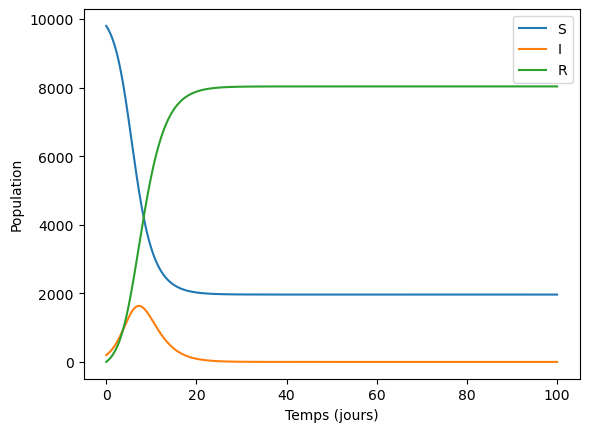

In [65]:
Ns0 = 9800
Ni0 = 200
Nr0 = 0
X0=[Ns0,Ni0,Nr0]

N0=Ns0+Ni0+Nr0
β=1
β0=β/N0
g=0.5

def SIR(X,t):
    S=X[0]
    I=X[1]
    R=X[2]
    ds= -β0*S*I
    di= β0*S*I-g*I
    dr= -ds-di
    return np.array([ds,di,dr])

from scipy.integrate import odeint
t0 = 0
dt = 0.01
tf = 100.
t = np.arange(t0, tf, dt)
Nsir = odeint(SIR,X0,t)
Ns=Nsir[:,0]
Ni=Nsir[:,1]
Nr=Nsir[:,2]

plt.ylabel('Population')
plt.xlabel('Temps (jours)')
plt.plot(t,Ns,label="S")
plt.plot(t,Ni,label="I")
plt.plot(t,Nr,label="R")
plt.legend()
plt.show()

/var/folders/9s/lqq830r928bb1cp4lpbbxp600000gn/T/ipykernel_17321/3942513662.py:4: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


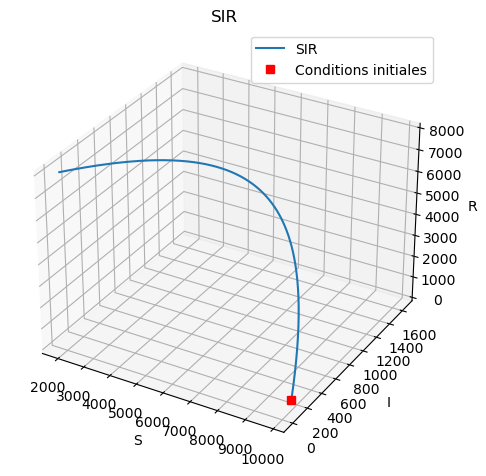

In [73]:
from mpl_toolkits.mplot3d import axes3d

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(Ns, Ni, Nr, label='SIR')
plt.title("SIR")
ax.set_xlabel('S')
ax.set_ylabel('I')
ax.set_zlabel('R')
plt.tight_layout()

#R = root(SIR,x0=np.array([8000,1,2000]),args=(t))
#print(R.x)

ax.plot(Ns0,Ni0,Nr0,"s",color="r",label="Conditions initiales")
#ax.plot(R.x[0],R.x[1],R.x[2],"s",color="g",label="Point fixe stable")
plt.legend()
plt.show()

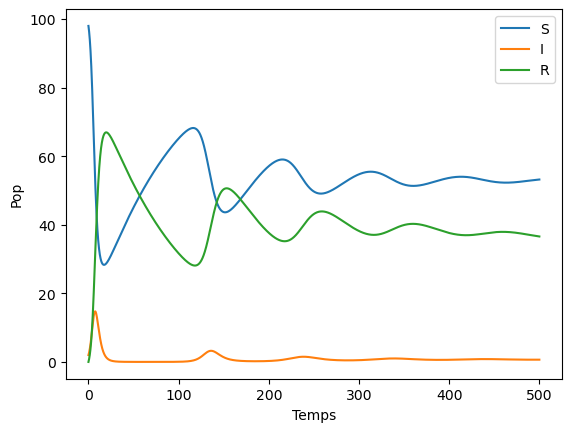

In [81]:
Ns0 = 98
Ni0 = 2
Nr0 = 0
X0=[Ns0,Ni0,Nr0]

g=0.5
β=0.01
B=0.01
d=0.01
p=0.02

def SIR_2(X,t):
    S=X[0]
    I=X[1]
    R=X[2]
    ds= -β*S*I - d*S + B*(S+I+R)
    di= β*S*I-g*I - d*I - p*I
    dr= g*I - d*R
    return np.array([ds,di,dr])

from scipy.integrate import odeint
t0 = 0
dt = 0.01
tf = 500.
t = np.arange(t0, tf, dt)
Nsir = odeint(SIR_2,X0,t)
Ns=Nsir[:,0]
Ni=Nsir[:,1]
Nr=Nsir[:,2]

plt.ylabel('Pop')
plt.xlabel('Temps')
plt.plot(t,Ns,label="S")
plt.plot(t,Ni,label="I")
plt.plot(t,Nr,label="R")
plt.legend()
plt.show()

/var/folders/9s/lqq830r928bb1cp4lpbbxp600000gn/T/ipykernel_17321/3989747919.py:4: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


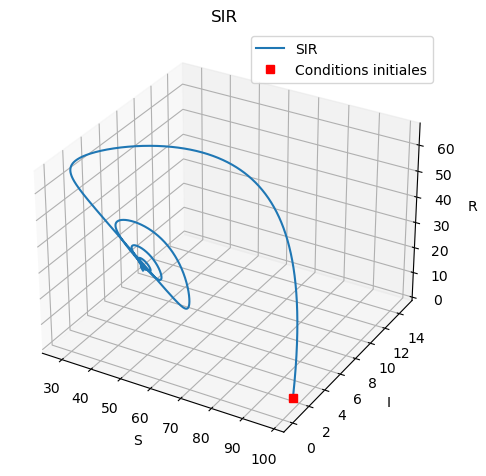

In [78]:
from mpl_toolkits.mplot3d import axes3d

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(Ns, Ni, Nr, label='SIR')
plt.title("SIR")
ax.set_xlabel('S')
ax.set_ylabel('I')
ax.set_zlabel('R')
plt.tight_layout()

from scipy.optimize import root

#R = root(SIR_2,x0=np.array([50,40,50]),args=(t))
#print(R.x)


ax.plot(Ns0,Ni0,Nr0,"s",color="r",label="Conditions initiales")
#ax.plot(R.x[0],R.x[1],R.x[2],"s",color="g",label="Point fixe stable")
plt.legend()
plt.show()
